<a href="https://colab.research.google.com/github/LindaMjw/project_chd/blob/main/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
! git clone https://github.com/LindaMjw/project_chd

fatal: destination path 'project_chd' already exists and is not an empty directory.


In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/project_chd/fhs_train.csv')  # Replace 'your_data.csv' with your dataset filename

# Handling missing values
# Identify variables with missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Unnamed: 0           0
sex                  0
age                  0
education           85
currentSmoker        0
cigsPerDay          24
BPMeds              37
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             39
sysBP                0
diaBP                0
BMI                 15
heartRate            0
glucose            285
TenYearCHD           0
dtype: int64


'Education' is categorical variable which is hard to choose one default value to replace Nan. And the whole dataset contains 3180 observations. Having 85 missing values only occupied 2.67% of the whole dataset, so we decide to clean those Nans.

In [115]:
df.describe()

,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3180.000000,3180.000000,3180.000000,3095.000000,3180.000000,3156.000000,3143.000000,3180.000000,3180.000000,3180.000000,3141.000000,3180.000000,3180.000000,3165.000000,3180.000000,2895.000000,3180.000000
mean,2129.740881,0.433019,49.633962,1.957027,0.490881,8.970532,0.029590,0.006604,0.321069,0.026101,236.600764,132.784748,83.117767,25.888117,75.942138,81.833506,0.153145
std,1231.779357,0.495571,8.557596,1.011135,0.499995,12.013704,0.169479,0.081008,0.466961,0.159460,44.847411,22.433267,12.009212,4.130475,12.050504,23.625357,0.360184
min,1.000000,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.000000
25%,1062.750000,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.000000,75.000000,23.100000,68.000000,71.000000,0.000000
50%,2137.500000,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,129.000000,82.000000,25.490000,75.000000,78.000000,0.000000
75%,3209.250000,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.125000,90.000000,28.140000,83.000000,87.000000,0.000000
max,4240.000000,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,140.000000,394.000000,1.000000


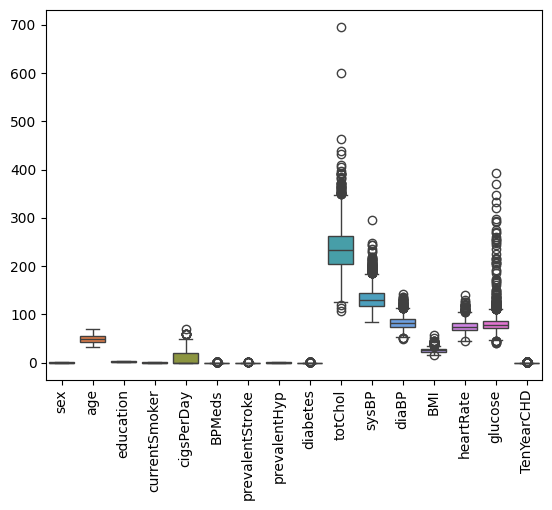

In [116]:
df= df.iloc[:, 1:]
sns.boxplot(data=df)
plt.xticks(rotation=90) #rotate the x-axis label
plt.show()

In [117]:
df = df.dropna()

In [118]:
df.loc[:, 'age'] = np.arcsinh(df['age'])
df.loc[:, 'cigsPerDay'] = np.arcsinh(df['cigsPerDay'])
df.loc[:, 'totChol'] = np.arcsinh(df['totChol'])
df.loc[:, 'sysBP'] = np.arcsinh(df['sysBP'])
df.loc[:, 'diaBP'] = np.arcsinh(df['diaBP'])
df.loc[:, 'BMI'] = np.arcsinh(df['BMI'])
df.loc[:, 'heartRate'] = np.arcsinh(df['heartRate'])
df.loc[:, 'glucose'] = np.arcsinh(df['glucose'])

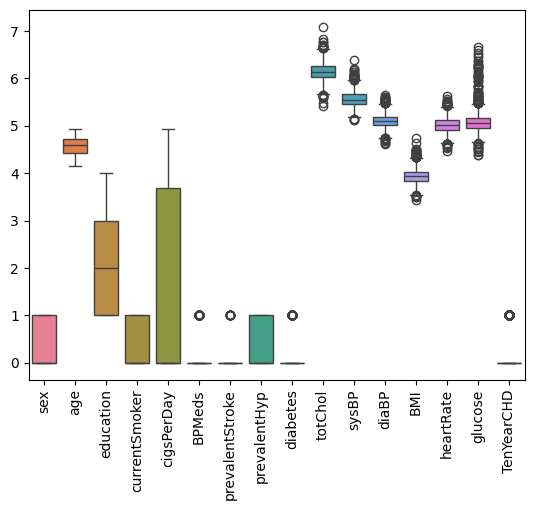

In [119]:
sns.boxplot(data=df)
plt.xticks(rotation=90) #rotate the x-axis label
plt.show()

In [120]:
df_test = pd.read_csv('/content/project_chd/fhs_test.csv')
df_test = df_test.dropna()

In [121]:
# Detecting and handling outliers for sex
Q1 = df['sex'].quantile(0.25)
Q3 = df['sex'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#filtering out the outliers
df_filtered = df[(df['sex'] >= lower_bound) & (df['sex'] <= upper_bound)]


# Detecting and handling outliers for age
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#filtering out the outliers
df_filtered = df_filtered[(df_filtered['age'] >= lower_bound) & (df_filtered['age'] <= upper_bound)]

# Detecting and handling outliers for education
Q1 = df_filtered['education'].quantile(0.25)
Q3 = df_filtered['education'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#filtering out the outliers
df_filtered = df_filtered[(df_filtered['education'] >= lower_bound) & (df_filtered['education'] <= upper_bound)]

# Detecting and handling outliers for  currentSmoker
Q1 = df_filtered['currentSmoker'].quantile(0.25)
Q3 = df_filtered['currentSmoker'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#filtering out the outliers
df_filtered = df_filtered[(df_filtered['currentSmoker'] >= lower_bound) & (df_filtered['currentSmoker'] <= upper_bound)]


# Detecting and handling outliers for cigsPerDay
Q1 = df['cigsPerDay'].quantile(0.25)
Q3 = df['cigsPerDay'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#filtering out the outliers
df_filtered = df[(df['cigsPerDay'] >= lower_bound) & (df['cigsPerDay'] <= upper_bound)]

# Detecting and handling outliers for BPMeds
Q1 = df_filtered['BPMeds'].quantile(0.25)
Q3 = df_filtered['BPMeds'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#filtering out the outliers
df_filtered = df_filtered[(df_filtered['BPMeds'] >= lower_bound) & (df_filtered['BPMeds'] <= upper_bound)]

# Detecting and handling outliers for prevalentStroke
Q1 = df_filtered['prevalentStroke'].quantile(0.25)
Q3 = df_filtered['prevalentStroke'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#filtering out the outliers
df_filtered = df_filtered[(df_filtered['prevalentStroke'] >= lower_bound) & (df_filtered['prevalentStroke'] <= upper_bound)]

# Detecting and handling outliers for prevalentHyp
Q1 = df_filtered['prevalentHyp'].quantile(0.25)
Q3 = df_filtered['prevalentHyp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#filtering out the outliers
df_filtered = df_filtered[(df_filtered['prevalentHyp'] >= lower_bound) & (df_filtered['prevalentHyp'] <= upper_bound)]

# Detecting and handling outliers for diabetes
Q1 = df_filtered['diabetes'].quantile(0.25)
Q3 = df_filtered['diabetes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#filtering out the outliers
df_filtered = df_filtered[(df_filtered['diabetes'] >= lower_bound) & (df_filtered['diabetes'] <= upper_bound)]

# Detecting and handling outliers for totChol
Q1 = df_filtered['totChol'].quantile(0.25)
Q3 = df_filtered['totChol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#filtering out the outliers
df_filtered = df_filtered[(df_filtered['totChol'] >= lower_bound) & (df_filtered['totChol'] <= upper_bound)]

# Detecting and handling outliers for sysBP
Q1 = df_filtered['sysBP'].quantile(0.25)
Q3 = df_filtered['sysBP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#filtering out the outliers
df_filtered = df_filtered[(df_filtered['sysBP'] >= lower_bound) & (df_filtered['sysBP'] <= upper_bound)]

# Detecting and handling outliers for diaBP
Q1 = df_filtered['diaBP'].quantile(0.25)
Q3 = df_filtered['diaBP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#filtering out the outliers
f_filtered = df_filtered[(df_filtered['diaBP'] >= lower_bound) & (df_filtered['diaBP'] <= upper_bound)]

# Detecting and handling outliers for BMI
Q1 = df_filtered['BMI'].quantile(0.25)
Q3 = df_filtered['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#filtering out the outliers
df_filtered = df_filtered[(df_filtered['BMI'] >= lower_bound) & (df_filtered['BMI'] <= upper_bound)]

# Detecting and handling outliers for heartRate
Q1 = df_filtered['heartRate'].quantile(0.25)
Q3 = df_filtered['heartRate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#filtering out the outliers
df_filtered = df_filtered[(df_filtered['heartRate'] >= lower_bound) & (df_filtered['heartRate'] <= upper_bound)]

# Detecting and handling outliers for glucose
Q1 = df_filtered['glucose'].quantile(0.25)
Q3 = df_filtered['glucose'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#filtering out the outliers
df_filtered = df_filtered[(df_filtered['glucose'] >= lower_bound) & (df_filtered['glucose'] <= upper_bound)]

# Detecting and handling outliers for TenYearCHD
Q1 = df_filtered['TenYearCHD'].quantile(0.25)
Q3 = df_filtered['TenYearCHD'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#filtering out the outliers
df_filtered = df_filtered[(df_filtered['TenYearCHD'] >= lower_bound) & (df_filtered['TenYearCHD'] <= upper_bound)]


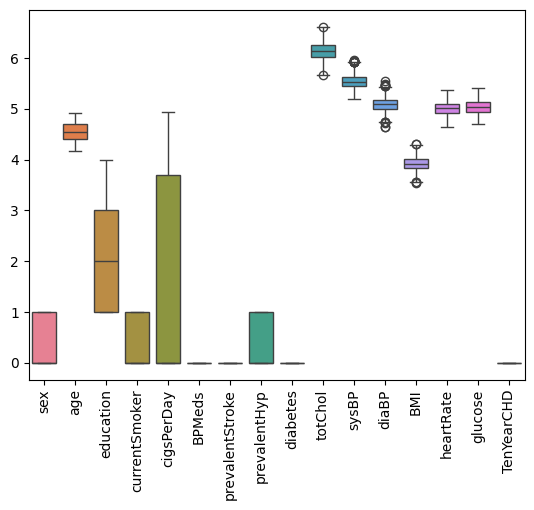

In [122]:
sns.boxplot(data=df_filtered)
plt.xticks(rotation=90) #rotate the x-axis label
plt.show()

In [123]:
df_test.loc[:, 'age'] = np.arcsinh(df_test['age'])
df_test.loc[:, 'cigsPerDay'] = np.arcsinh(df_test['cigsPerDay'])
df_test.loc[:, 'totChol'] = np.arcsinh(df_test['totChol'])
df_test.loc[:, 'sysBP'] = np.arcsinh(df_test['sysBP'])
df_test.loc[:, 'diaBP'] = np.arcsinh(df_test['diaBP'])
df_test.loc[:, 'BMI'] = np.arcsinh(df_test['BMI'])
df_test.loc[:, 'heartRate'] = np.arcsinh(df_test['heartRate'])
df_test.loc[:, 'glucose'] = np.arcsinh(df_test['glucose'])

In [124]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

x_train_sex = df[['sex']]  # Feature: sex
y_train = df['TenYearCHD']  # Target variable: TenYearCHD

x_test_sex = df_test[['sex']]  # Feature: sex
y_test = df_test['TenYearCHD']  # Target variable: TenYearCHD

reg_n = linear_model.LinearRegression().fit(x_train_sex,y_train) # Run regression


# Print the coefficients
print("Intercept:", reg_n.intercept_)
print("Coefficient for sex:", reg_n.coef_[0])

y_hat = reg_n.predict(x_test_sex)
print('Sex Rsq: ', reg_n.score(x_test_sex,y_test)) # R2
rmse_n = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Sex RMSE: ', rmse_n)

Intercept: 0.1215946843853819
Coefficient for sex: 0.07291701860089754
Sex Rsq:  0.002209348517005716
Sex RMSE:  0.35222879498250875


In [125]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Selecting features and target variable for training and testing
X_train = df.drop(columns=['TenYearCHD'])  # Features for training
y_train = df['TenYearCHD']  # Target variable for training

X_test = df_test.drop(columns=['TenYearCHD'])  # Features for testing
y_test = df_test['TenYearCHD']  # Target variable for testing

# Loop through each feature variable and perform linear regression
for column in X_train.columns:
    # Extract single feature for training and testing
    x_train_feature = X_train[[column]]
    x_test_feature = X_test[[column]]

    # Initialize and fit the linear regression model
    reg = linear_model.LinearRegression().fit(x_train_feature,y_train)

    # Make predictions
    y_pred = reg.predict(x_test_feature)

    # Calculate R-squared
    r_sqr = reg.score(x_test_feature, y_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    # Print results
    print(f"Variable: {column}")
    print(f"R-squared: {r_sqr}")
    print(f"MSE: {mse}")
    print("\n")

Variable: sex
R-squared: 0.002209348517005716
MSE: 0.12406512401483016


Variable: age
R-squared: 0.0537712700448536
MSE: 0.11765392324913085


Variable: education
R-squared: 0.005143768877070909
MSE: 0.1237002586742479


Variable: currentSmoker
R-squared: 0.00015614707362332503
MSE: 0.12432041874155672


Variable: cigsPerDay
R-squared: 0.002025348019406681
MSE: 0.12408800260616541


Variable: BPMeds
R-squared: 0.003574703920593336
MSE: 0.12389535595053866


Variable: prevalentStroke
R-squared: 0.00298468322208556
MSE: 0.12396871902627293


Variable: prevalentHyp
R-squared: 0.04560862198397231
MSE: 0.11866886555437044


Variable: diabetes
R-squared: 0.004021209529988301
MSE: 0.12383983751716733


Variable: totChol
R-squared: -0.0077796159248533225
MSE: 0.1253071501957901


Variable: sysBP
R-squared: 0.05602014356257112
MSE: 0.11737429868915465


Variable: diaBP
R-squared: 0.025288814879284027
MSE: 0.12119542699754862


Variable: BMI
R-squared: 0.009004204467022991
MSE: 0.12322025275366

Choose the variable that has greather than 0.01 r-square to make a Multiple Linear Regression.

In [126]:
features = ['age', 'prevalentHyp', 'sysBP', 'diaBP', 'glucose']
target = 'TenYearCHD'

x_train_feature = df[features]
x_test_feature = df_test[features]

# Initialize and fit the linear regression model
reg = linear_model.LinearRegression().fit(x_train_feature,y_train)

# Make predictions
y_pred = reg.predict(x_test_feature)

# Calculate R-squared
r_sqr = reg.score(x_test_feature, y_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)


print(f"R-squared: {r_sqr}")
print(f"MSE: {mse}")

R-squared: 0.08419800875695893
MSE: 0.11387066760720473
